# 線形回帰  


## Gradient Descentで解くLinear Regression  

### Linear Regressionの意味  
Linear Regressionが示すもの: 数多くの点をできるだけうまく説明できるトレンドラインを引くにはどうすればよいか？  

### 線形代数の観点から見た回帰分析  
※最適化問題に興味がある人は「線形代数の観点から見た回帰分析」部分を飛ばしても問題ありません。  

### 前提条件  
この内容を理解するためには、以下の内容を理解していると良いです。  

- ベクトルの基本演算（スカラー倍、加算）  
- 行ベクトルの意味とベクトルの内積  
- 4つの主要な部分空間の関係  
- 連立線形方程式を利用した解の求め方  

### 連立方程式の解法  
中学校時代に連立方程式について学んだことがあると思います。連立方程式は2つ以上の未知数を含む方程式の組のことを指し、通常、中学・高校の課程では2元1次連立方程式を解くことが多かったように思います。  

一般的な連立方程式の形は以下のように書けます。  

$$
\begin{cases}
ax + by = p \\
cx + dy = q
\end{cases}
\tag{1}
$$

今回は、未知数の数よりもデータの数がはるかに多い場合について、適切な解を探す過程を通じて線形回帰について考えてみます。  

例えば、次のように3つのデータポイントが与えられているとします。  

$$
(-1, 0), (0, 1), (0, 3)
\tag{2}
$$



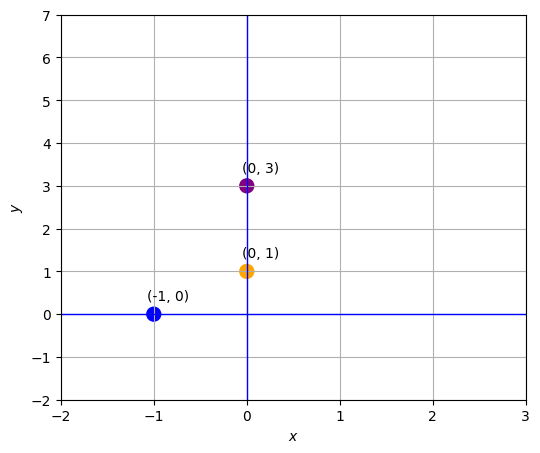

In [3]:
import matplotlib.pyplot as plt

# データポイント
x = [-1, 0, 0]
y = [0, 1, 3]
colors = ['blue', 'orange', 'purple']

# プロットの作成
plt.figure(figsize=(6, 5))
plt.scatter(x, y, c=colors, s=100)

# 軸線の追加
plt.axhline(0, color='blue', lw=1)
plt.axvline(0, color='blue', lw=1)

# ラベルの追加
labels = ['(-1, 0)', '(0, 1)', '(0, 3)']
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(10,10), ha='center')

# 軸の範囲設定
plt.xlim(-2, 3)
plt.ylim(-2, 7)

# 軸ラベル
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# グリッドの追加
plt.grid(True)

# グラフの表示
plt.show()


#### 図1. 与えられた3つのデータポイント  

この3点に対して $ f(x) = mx + b $ というモデルを用いて、これらのデータポイントが得られたと仮定すると、以下のように3つの方程式で構成された連立方程式を立てることができます。  

$$
f(-1) = -m + b = 0
\tag{3}
$$

$$
f(0) = 0 + b = 1
\tag{4}
$$

$$
f(0) = 0 + b = 3
\tag{5}
$$

これを行列とベクトルを用いて表すと、以下のようになります。  

$$
(Ax = b) \Rightarrow
\begin{bmatrix}
-1 & 1 \\
0 & 1 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
m \\
b
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1 \\
3
\end{bmatrix}
\tag{6}
$$

この行列を解く問題は、図1のように3つのデータポイントが与えられたとき、これらのポイントをすべて通過する直線を求める問題と同じです。  

### 線形代数の観点からの連立方程式  
線形代数の観点から連立方程式を解くことは、以下のような行列を解くことと同じです。  

$$
A\vec{x} = \vec{b}
\tag{7}
$$

ここでベクトルと行列をすべて列ベクトルで表現し、$\vec{x}$ の2つの要素に分けると以下のようになります。  

$$
\Rightarrow
\begin{bmatrix}
| & | \\
\vec{a_1} & \vec{a_2} \\
| & |
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
| \\
\vec{b} \\
|
\end{bmatrix}
\tag{8}
$$

つまり、$\vec{a_1}$ と $\vec{a_2}$ をどう組み合わせれば $\vec{b}$ を得られるかという問題で、適切な組み合わせの比率が $x_1$ と $x_2$ であることを示しています。  


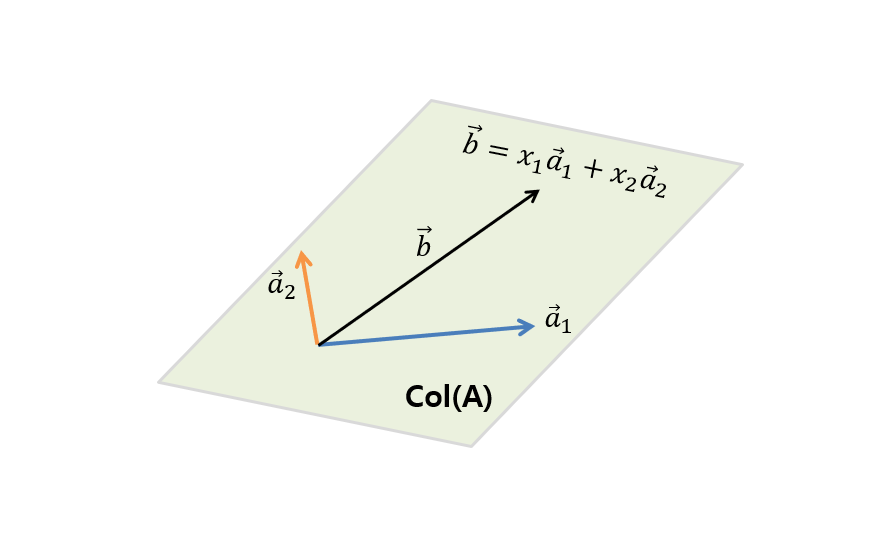

#### 図2. 行列 $A$ の列（$\vec{a_1}$, $\vec{a_2}$）で生成される空間（$A$ の列空間）に含まれる $\vec{b}$ を求めるには、$\vec{a_1}$ と $\vec{a_2}$ をどれだけ組み合わせる必要があるのか？  



しかし、$\vec{a_1}$ と $\vec{a_2}$ を組み合わせて $\vec{b}$ を得るためには、$\vec{b}$ が $\vec{a_1}$ と $\vec{a_2}$ を組み合わせて得られるすべての可能性の一つでなければなりません。  

つまり、$\vec{b}$ が $\vec{a_1}$ と $\vec{a_2}$ の生成空間（span）内に含まれていなければならず、これが解が見つかる条件です。  

### 最適な解を見つける  
もし正確な解が見つからないなら、少なくともその代わりに解に最も近いものを見つける必要があります。つまり、3つの点のトレンドを最もよく表す直線を見つけようとすることができるはずです。  


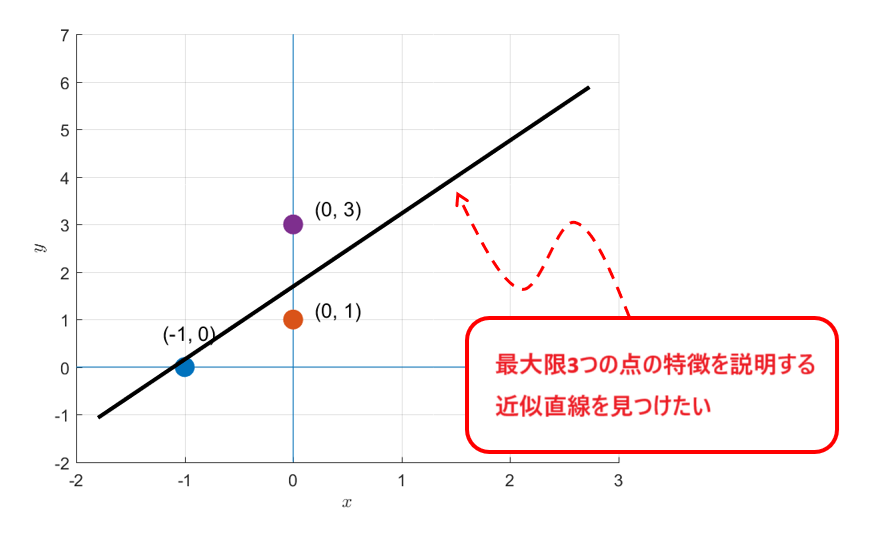

#### 図3. 3つの点のトレンドをうまく説明できる可能性のある直線を引く  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ベクトルの定義（3次元）
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
b = np.array([1.5, 1.2, 1.0])
p = np.array([1.2, 1.1, 0])
e = b - p

# 3Dプロットの設定
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 平面の描画
xx, yy = np.meshgrid(np.linspace(-0.5, 2.5, 10), np.linspace(-0.5, 2.5, 10))
zz = np.zeros_like(xx)  # z = 0 の平面
ax.plot_surface(xx, yy, zz, color='lightblue', alpha=0.5)

# ベクトルの描画
ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='blue', label=r'$\vec{a}_1$')
ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='blue', label=r'$\vec{a}_2$')
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='green', label=r'$\vec{b}$')
ax.quiver(0, 0, 0, p[0], p[1], p[2], color='red', label=r'$\vec{p} = A\hat{x}$')
ax.quiver(p[0], p[1], p[2], e[0], e[1], e[2], color='magenta', label=r'$\vec{e} = \vec{b} - \vec{p}$')

# 垂線の描画（破線）
ax.plot([b[0], p[0]], [b[1], p[1]], [b[2], p[2]], linestyle='--', color='black')

# ラベルの追加
ax.text(a1[0], a1[1], a1[2], r'$\vec{a}_1$', fontsize=12, color='blue')
ax.text(a2[0], a2[1], a2[2], r'$\vec{a}_2$', fontsize=12, color='blue')
ax.text(b[0], b[1], b[2], r'$\vec{b}$', fontsize=12, color='green')
ax.text(p[0], p[1], p[2], r'$\vec{p}$', fontsize=12, color='red')
ax.text((b[0] + p[0]) / 2, (b[1] + p[1]) / 2, (b[2] + p[2]) / 2, r'$\vec{e}$', fontsize=12, color='magenta')

# 軸の設定
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([-0.5, 2.5])
ax.set_zlim([-0.5, 2.5])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.grid(True)

# 凡例とタイトル
ax.legend()
plt.title('3D Vector projection and error vector')

# グラフの表示
plt.show()




#### 図4. 列空間内に含まれないベクトル $\vec{b} = [0, 1, 3]^T$（紫色）と $\vec{a_1} = [-1, 0, 0]^T$（青色）、$\vec{a_2} = [1, 1, 1]^T$（オレンジ色）の生成する列空間  

図4をもう少し抽象的に描くと以下の図5のようになります。

ここで、3つの点のトレンドを最もよく表現する直線を探す過程は、線形代数的には、$\vec{b}$ が行列 $A$ の列空間（column space）に存在しない場合、その列空間内にある最適な解を見つける過程と一致しています。  

実際に図1や図3の問題では、$\vec{a_1}$、$\vec{a_2}$、およびこれらの2つのベクトルから生成される列空間、$\vec{b}$ を直接描くと以下のようになります。  

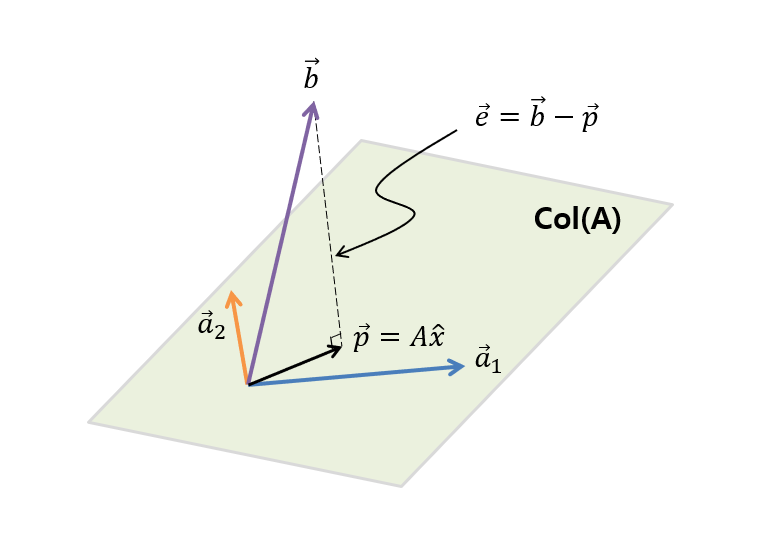

#### 図5. $A$ の列を構成する列ベクトル（$\vec{a_1}$, $\vec{a_2}$）の生成する列空間と、列空間に含まれない $\vec{b}$

図5のように、$\vec{b}$ は $\vec{a_1}$ と $\vec{a_2}$ の列空間に含まれていません。そして、$\vec{b}$ と最も近く、$\vec{a_1}$ と $\vec{a_2}$ の線形結合で得られる最適なベクトルは、$\vec{b}$ が列空間に直交射影された $\vec{p}$ です。この $\vec{p}$ を計算することで、$\vec{a_1}$ と $\vec{a_2}$ をどれだけ線形結合するか（$\hat{x}$）を知ることができます。  

元の解 $\vec{b}$ と直交射影ベクトル $\vec{p}$ の差ベクトルを $\vec{e}$ とすると、$\vec{e}$ は行列 $A$ のいかなるベクトルとも直交するため、次が成立します。  

$$
A \cdot \vec{e} =
\begin{bmatrix}
| & | \\
\vec{a_1} & \vec{a_2} \\
| & |
\end{bmatrix}
\cdot \vec{e} = 0
\tag{10}
$$

ここで「$\cdot$」は内積演算です。内積を計算すると、次のようになります。

$$
A^T e = A^T (\vec{b} - A \hat{x}) = 0
\tag{11}
$$

$$
\Rightarrow A^T \vec{b} - A^T A \hat{x} = 0
\tag{12}
$$

$$
\Rightarrow A^T A \hat{x} = A^T \vec{b}
\tag{13}
$$

$$
\therefore \hat{x} = (A^T A)^{-1} A^T \vec{b}
\tag{14}
$$

という結果になります。

### 基本部分空間を使った説明
図5の $\vec{e}$ は列空間（column space）上のすべてのベクトルと直交します。これは、4つの主要な部分空間の関係で学んだ内容に基づいて考えると、$\vec{e}$ がleft null spaceに位置していることを示しています。つまり、ベクトル $\vec{b}$ は、列空間上で作成できる基底ベクトルとleft null space上で作成できる基底ベクトルの組み合わせで構成できる空間に位置しており、$\vec{p}$ はその中で最も近い列空間上のベクトルで、$\vec{e}$ はleft null space上のベクトルを表します。

以下の図で視覚的に示しています。

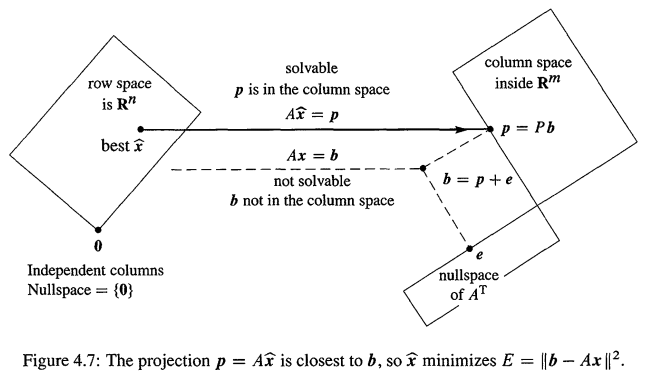
#### 図6. 線形代数的に考える線形回帰の基本空間の関係  

出典：Introduction to Linear Algebra, Gilbert Strang

ここでnull spaceが0であるのは、もしnull spaceが零空間でなければ、関数の形は完全に垂直な形になり、関数が定義されないため（すなわち、傾きが無限に大きくなる状態）、線形回帰モデルを使って解を求める際には、null spaceが零空間でない場合は除外するためです。

In [2]:
import numpy as np

# 行列とベクトルの定義
A = np.array([[-1, 1], [0, 1], [0, 1]])
b = np.array([0, 1, 3])

# 最小二乗解の計算
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b

# 結果の表示
print("x_hat =", x_hat)


x_hat = [2. 2.]


### 実際の計算
pythonで以下のように行列 $A$ とベクトル $\vec{b}$ を設定し、$\hat{x}$ を求めることができます。

つまり、図7で示されるように、傾きが2で切片も2の直線が、図1と図3で見た3つの点のトレンドを最もよく説明できる線ということです。

#### 図7. 図1および図3のデータに対する最適な回帰直線



### 最適化問題の観点から見た回帰分析
※線形代数の内容に興味がある方は、「最適化問題の観点から見た回帰分析」部分を飛ばしても問題ありません。

### 前提条件
最適化の観点から回帰分析を理解するためには、以下の内容について理解していると良いです。

- 勾配（gradient）の意味
- 勾配降下法（Gradient Descent）

### 最適化問題の観点から見た回帰分析の紹介
最適化の観点から見る回帰分析は、データに対するモデル設定から始めることができます。たとえば、以下の図のように、2つの特徴量を持つデータがあると考えてみましょう。



#### 図8. 相関関係を持つ特徴量（feature）のペア

このデータは、特定の州（state）の人口と各州で発生した交通事故件数を、それぞれx軸とy軸に示しています。このデータに対するモデルを仮定してみたいと思います。

データの形を見ると、直線モデルを使うことで、どうにかこのデータをモデリングすることができそうです。すなわち、私たちのモデルは以下のように2つのパラメータを持つ1次関数といえるでしょう。

$$
y = f(x) = ax + b
\tag{15}
$$

しかし、このモデルのパラメータ $a$ と $b$ はどうやって決めればよいのでしょうか？つまり、どの直線が私たちのデータを最もよく説明してくれるのでしょうか？


#### 図9. どのモデルがこのデータの特徴量ペアの関係を最もよく説明してくれるのだろうか？


### コスト関数の定義
ここで、どの直線がデータを最もよく説明するモデルであるかを決める必要があります。「最もよく説明する」という言葉を別の言葉で定義すると、モデルとデータ間のズレが最も小さいものを指すと言えるでしょう。

すなわち、全データに対して平均的に誤差（error）が最も小さいモデルが、より良いモデルと言えるのです。私たちは任意の $i$ 番目のデータポイントに対する誤差（$e$）を次のように定義できます。

モデルから計算されたy軸の予測値を $\hat{y_i}$、実際のy軸の値を $y_i$ とすると、

$$
e_i = \hat{y_i} - y_i
\tag{16}
$$

と考えることができます。

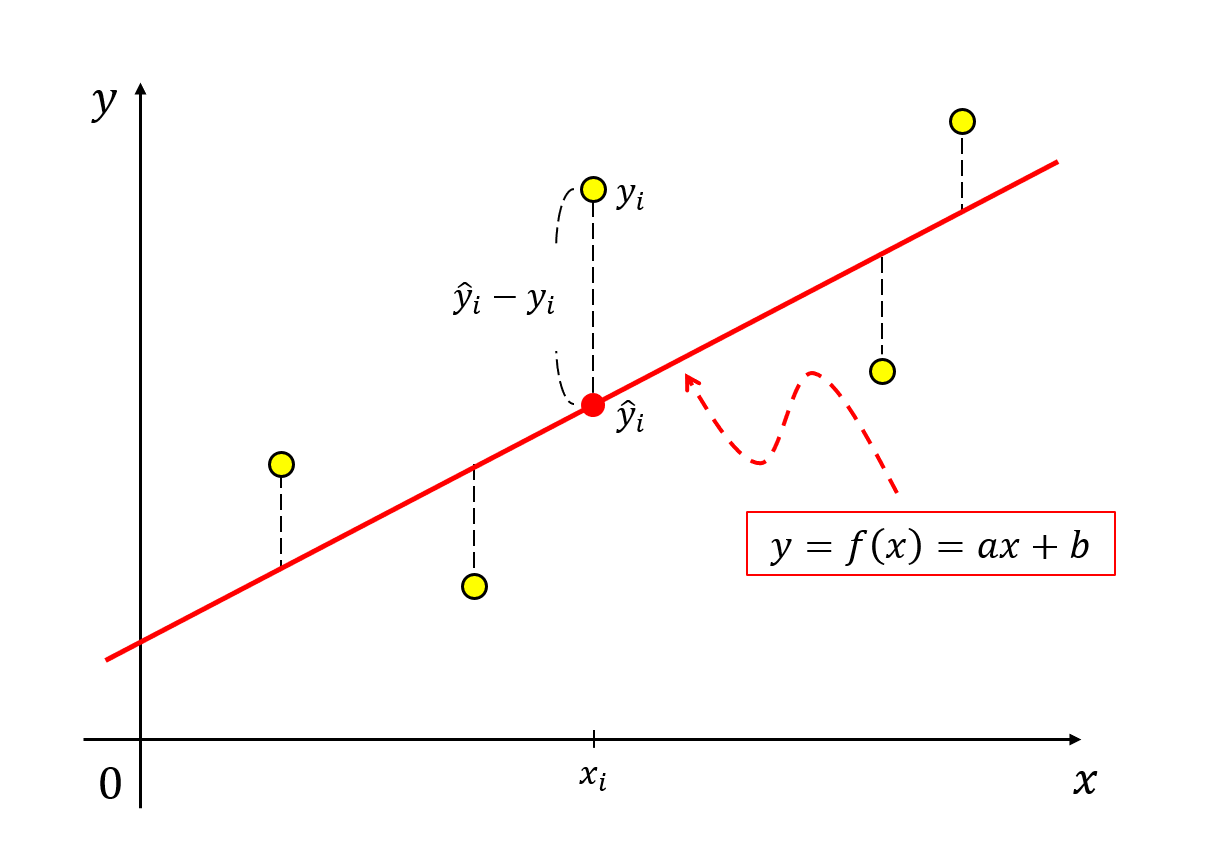

#### 図10. 線形モデルの予測値と実際のデータ間の差

ここで、誤差の符号についての悩みを避けるために、次のように誤差を定義するのも良いでしょう。

$$
e_i = (\hat{y_i} - y_i)^2
\tag{17}
$$

後で説明しますが、誤差は微分して使用するため、微分過程を少しでも簡潔にするために次のように定義するのも良いアイディアです。

$$
e_i = \frac{1}{2}(\hat{y_i} - y_i)^2
\tag{18}
$$

データの総数を $N$ とすると、すべてのデータに対する平均的な誤差は以下のように計算できます。

$$
E = \frac{1}{N} \sum_{i=1}^{N} e_i = \frac{1}{N} \sum_{i=1}^{N} \frac{1}{2}(\hat{y_i} - y_i)^2 = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y_i} - y_i)^2
\tag{19}
$$

$$
= \frac{1}{2N} \sum_{i=1}^{N} (ax_i + b - y_i)^2
\tag{20}
$$

ここで私たちのモデルは $f(x) = ax + b$ なので、$\hat{y_i} = ax_i + b$ として計算しています。

### コスト関数の視覚化
先ほど計算した $E$ は、いわゆる「コスト関数（cost function）」と呼ばれるもので、コスト関数の値が小さいほどデータに対する説明能力が優れていると見なせます。

データの $x_i$ と $y_i$ は既に与えられているものなので、コスト関数 $E$ をパラメータ $a$ と $b$ の関数として考えても良いでしょう。つまり、

$$
E = f(a, b) = \frac{1}{2N} \sum_{i=1}^{N} (ax_i + b - y_i)^2
\tag{21}
$$

と書けます。

それでは、データをよく説明する回帰モデルを探すことは、$E$ を最小化する $a$ と $b$ を見つける問題に置き換えて考えることができます。すなわち、$E$ の最小値を見つける問題として考えられるのです。

これを視覚化すると、以下の図11のように、slope（ここでは $a$ に相当）とintercept（ここでは $b$ に相当）が定義域の空間で、コスト関数 $E$ がスカラー関数として存在するということができます。


#### 図11. slopeとinterceptが定義域の空間でのコスト関数とその最小値（星印）  
※ コスト関数のパラメータはすべて正規化して視覚化されています。

つまり、図11で見られる最小値を見つけるためには、どのようにすれば良いでしょうか？

### Gradient Descentを用いた最小コスト関数の計算
関数の最小値を見つける方法は数多くありますが、一般的に回帰モデルのコスト関数の最小値を見つける問題を解くためには、勾配降下法（Gradient Descent）が最もよく使用されます。

簡単に勾配降下法を復習すると、高い場所から低い場所へ斜面を降りる際に、最も傾斜が急な方向に一歩一歩進む方法を数学的に表現したアルゴリズムです。

勾配（Gradient）の意味を考えると、勾配は傾きが「増加する」方向で定義される点に注目する必要があります。次の図を見ると、黒い点で示された場所から任意にGradient Descentアルゴリズムを開始すると、勾配の方向は赤い矢印で示されるように考えられます。


#### 図12. 定義域が $a$ と $b$（ここではslopeとintercept）であり、高さがコスト関数の値である関数空間で、任意のポイントでの勾配の方向は関数値が増加する方向です。

したがって、勾配の方向は関数が「増加する」方向であるため、私たちはその反対方向に一歩ずつ $a$ と $b$ の位置を更新していけば、最終的にコスト関数 $E = f(a, b)$ の最小値（星印）の位置まで $a$ と $b$ を移動させることができるでしょう。

#### 図13. 定義域が $a$ と $b$（ここではslopeとintercept）であり、高さがコスト関数の値である関数空間で、任意のポイントで勾配の反対方向に $a$ と $b$ の位置を更新していくことで、最終的にコスト関数が最小となる $a$ と $b$ を見つけ出すことができます。

つまり、求めたい関数 $f(a, b)$ からパラメータ $a$ と $b$ を任意の値に設定し、その後、それらを更新していくことができます。

ベクトル $\begin{bmatrix} a \\ b \end{bmatrix}$ に対して、以下のように更新していきます。

$$
\begin{bmatrix} a \\ b \end{bmatrix} := \begin{bmatrix} a \\ b \end{bmatrix} - \alpha \nabla f(a, b)
\tag{22}
$$

ここで $\alpha$ は学習率（learning rate）またはステップサイズ（step size）と呼ばれ、通常0.1や0.001などの小さな数値です。

これを展開すると、以下のようになります。

$$
a := a - \alpha \frac{\partial f}{\partial a}
\tag{23}
$$

$$
b := b - \alpha \frac{\partial f}{\partial b}
\tag{24}
$$



#### 図14. 勾配降下法（Gradient Descent）を用いてコスト関数の最小値を見つける過程  
※ コスト関数のパラメータはすべて正規化して視覚化されています。



このようにして、勾配降下法を利用して、データに最も適した線形回帰モデルを見つけ出すことができます。勾配降下法は、単純ながらも強力な手法であり、線形回帰をはじめ多くの最適化問題に広く応用されています。